<a href="https://colab.research.google.com/github/TheAdamEffect/CurrencyConverter/blob/main/LabWeek10_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Lab - Week 10 - Dropout

### Ways to reduce overfitting in neural networks - all come at a cost
 - Getting more training data
 - Reducing the capacity of the network (last week's lab)
 - Adding weight regularization (last week's lab)
 - Adding dropout (the subject for this week)

### Typical training and validation loss over time
![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*0VWDpLIRcMTssDf-zyOR4w.jpeg)

## Using dropout to reduce overfitting

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his
students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e. setting to zero) a number of
output features of the layer during training. Let's say a given layer would normally have returned a vector `[0.2, 0.5, 1.3, 0.8, 1.1]` for a
given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. `[0, 0.5,
1.3, 0, 1.1]`. The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test
time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to
balance for the fact that more units are active than at training time.

![dropout](https://cdn-images-1.medium.com/max/1600/1*iWQzxhVlvadk6VAJjsgXgg.png)

In Keras you can introduce dropout in a network via the `Dropout` layer, which gets applied to the output of layer right before it, e.g.:
```python
model.add(layers.Dropout(0.5))
```

In [1]:
import keras
keras.__version__

'3.8.0'

### Part 1: Load and Prepare Data - IMDB dataset (same as last week)

In [2]:
from keras import models, layers
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

# Load IMDB data (top 10,000 words)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Vectorization function
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Sanity Check
print('Train shape:', x_train.shape)
print('Test shape:', x_test.shape)
print('Train label example:', y_train[0])


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (25000, 10000)
Test shape: (25000, 10000)
Train label example: 1.0


**As a routine, perform a sanity check on the dataset to understand the shape of the train and test inputs and outputs, and print out a sample of the data.**

In [3]:
# Check shapes of datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Display a sample vectorized training example
print("\nSample vectorized input (first training example):")
print(x_train[0])

# Display a sample label
print("Sample label:", y_train[0])


x_train shape: (25000, 10000)
y_train shape: (25000,)
x_test shape: (25000, 10000)
y_test shape: (25000,)

Sample vectorized input (first training example):
[0. 1. 1. ... 0. 0. 0.]
Sample label: 1.0


### Part 2: Build a Simple Neural Network Model
Objective: Create a basic neural network model using Keras.

**Questions**
- What type of classification problem are we solving?
- How many neurons should there be in the output layer?
- What should be the activation function of the output layer?
- What loss function should be used?
- What activation function should be used on the hidden layers?


Build a sequential model with ne dense layer with 8 units and train it for 20 epochs.

Complete the code below:

In [4]:
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model for 20 epochs
hist_a = model.fit(x_train, y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_test, y_test))

# Evaluate
evaluation_results = model.evaluate(x_test, y_test)
print("Test Accuracy:", evaluation_results[1])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │          80,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,017 (312.57 KB)

 Trainable params: 80,017 (312.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.7538 - loss: 0.5583 - val_accuracy: 0.8691 - val_loss: 0.3879
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8899 - loss: 0.3380 - val_accuracy: 0.8828 - val_loss: 0.3203
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9113 - loss: 0.2683 - val_accuracy: 0.8825 - val_loss: 0.3007
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9276 - loss: 0.2236 - val_accuracy: 0.8875 - val_loss: 0.2843
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9316 - loss: 0.2027 - val_accuracy: 0.8888 - val_loss: 0.2780
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9374 - loss: 0.1858 - val_accuracy: 0.8878 - val_loss: 0.2791
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9465 - loss: 0.1657 - val_accuracy: 0.8861 - val_loss: 0.2835
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9486 - loss: 0.1594 - val_accuracy: 0.8852 - v

In [5]:
# Train the model
hist_a = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

# Evaluate the model
evaluation_results = model.evaluate(x_test, y_test)
print("Test accuracy:", evaluation_results[1])

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.9786 - loss: 0.0790 - val_accuracy: 0.8686 - val_loss: 0.3983
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9812 - loss: 0.0729 - val_accuracy: 0.8667 - val_loss: 0.4088
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9829 - loss: 0.0692 - val_accuracy: 0.8654 - val_loss: 0.4232
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9846 - loss: 0.0650 - val_accuracy: 0.8640 - val_loss: 0.4346
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9843 - loss: 0.0633 - val_accuracy: 0.8645 - val_loss: 0.4466
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.9836 - loss: 0.0612 - val_accuracy: 0.8625 - val_loss: 0.4582
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9875 - loss: 0.0571 - val_accuracy: 0.8622 - val_loss: 0.4682
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9873 - loss: 0.0535 - val_accuracy: 0.8619 - v

### Part 3: Visualize Training and Validation Performance

The function below can be used later to plot the loss and accuracy from the model training history

In [6]:
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

def plot_history(history, color='blue', prefix=""):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, "o", color=color, label=prefix + " Training loss")
    plt.plot(epochs, val_loss_values, color=color, label=prefix + " Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(framealpha=0.5)
    plt.grid()

    plt.subplot(1, 2, 2)
    val_acc_values = history_dict["val_accuracy"]
    plt.plot(epochs, val_acc_values, color=color, label=prefix + " Validation accuracy")
    plt.title("Validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(framealpha=0.5)
    plt.grid()

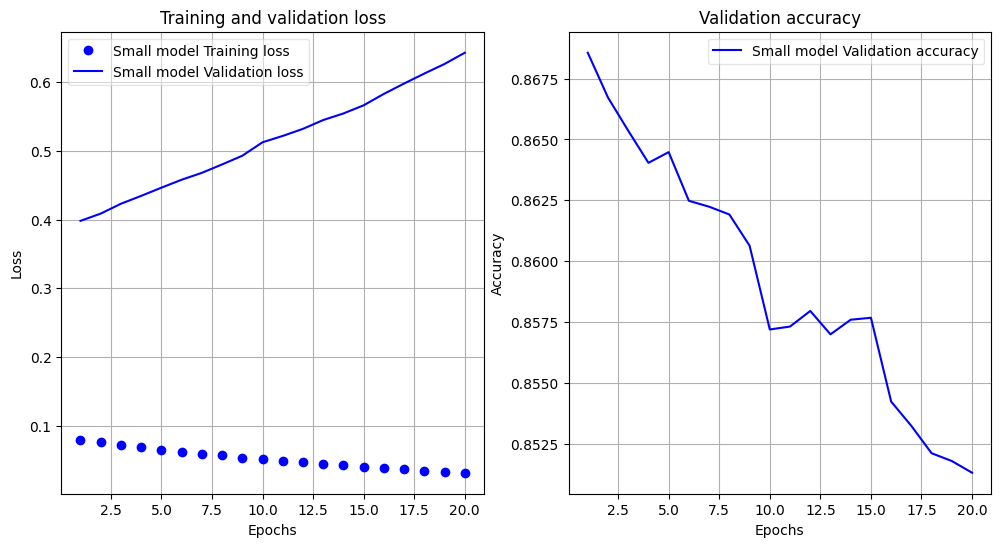

In [7]:
# Using the plotting function
plt.figure(figsize=(12, 6))
plot_history(hist_a, color='blue', prefix="Small model")

### Part 4: Add Dropout Regularization
Objective: Experiment with dropout layers in the model.

**Instructions:**
1. Add another hidden layer with 8 units
1. Add dropout layers after each hidden layer with a dropout rate of 0.3.
1. Compile the model.
1. Train the model and observe the changes in accuracy.

Complete the code below:

In [ ]:
drp_model = models.Sequential()
drp_model = models.Sequential()
drp_model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
drp_model.add(layers.Dropout(0.3))
drp_model.add(layers.Dense(8, activation='relu'))
drp_model.add(layers.Dropout(0.3))
drp_model.add(layers.Dense(1, activation='sigmoid'))

drp_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

drp_history = drp_model.fit(x_train, y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_test, y_test))

# Plot results
plt.figure(figsize=(12,6))
plot_history(drp_history, color='red', prefix="Dropout 0.3")
plt.show()


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.6135 - loss: 0.6409 - val_accuracy: 0.8244 - val_loss: 0.5112
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8241 - loss: 0.5045 - val_accuracy: 0.8760 - val_loss: 0.4291
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.8677 - loss: 0.4211 - val_accuracy: 0.8846 - val_loss: 0.3656
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8863 - loss: 0.3625 - val_accuracy: 0.8835 - val_loss: 0.3297
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9033 - loss: 0.3116 - val_accuracy: 0.8809 - val_loss: 0.3116
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9133 - loss: 0.2733 - val_accuracy: 0.8860 - val_loss: 0.3068
Epoch 7/20
20/49 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9329 - loss: 0.2289

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plot_history(drp_history, color='red', prefix="Dropout 0.3")

### Part 5: Test Different Dropout Rates
Objective: Compare the model's performance with varying dropout rates.

**Instructions:**
1. Write a loop to create and train models with dropout rates of `[0, 0.2, 0.3, 0.4, 0.5]`.
2. For each model, record the history to plot it later


Complete the code below:

In [ ]:
# Define dropout rates to experiment with
rates = [0, 0.2, 0.3, 0.4, 0.5]

# Initialize list to store training histories
hists = []

# Loop through dropout rates
for rate in rates:
    print(f"\nTraining model with dropout rate: {rate}")

    # Create a new Sequential model for each dropout rate
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
    model.add(layers.Dropout(rate))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(rate))
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model and record history
    hist = model.fit(x_train, y_train,
                     epochs=20,
                     batch_size=512,
                     validation_data=(x_test, y_test),
                     verbose=0)

    # Append training history
    hists.append(hist)

# Plotting the training and validation histories
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i, hist in enumerate(hists):
    plt.figure(figsize=(12, 6))
    plot_history(hist, color=colors[i], prefix=f"Dropout {rates[i]}")
    plt.show()



In [ ]:
plt.figure(figsize=(12, 6))
for i, hist in enumerate(hists):
    plot_history(hist, colors[i], prefix=str(rates[i]))

### Part 6: Experiment with dropout location
Objective: Compare the model's performance with dropout placed after different layers

**Instructions:**
Create 3 models with a single dropout "layer" placed:
1. Before the first dense layer only
2. After the first dense layer only
3. After the second dense layer only



Complete the code below:

In [ ]:
import matplotlib.pyplot as plt
from keras import models, layers
from keras.datasets import imdb
import numpy as np

# Data preparation (only if not already done)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Helper function to plot history clearly
colors = ['blue', 'red', 'green']

def plot_history(history, color='blue', prefix=""):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, "o", color=color, label=prefix + " Training loss")
    plt.plot(epochs, val_loss_values, color=color, label=prefix + " Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(framealpha=0.5)
    plt.grid()

    plt.subplot(1, 2, 2)
    val_acc_values = history_dict["val_accuracy"]
    plt.plot(epochs, val_acc_values, color=color, label=prefix + " Validation accuracy")
    plt.title("Validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(framealpha=0.5)
    plt.grid()

# Training models for dropout location experiments
rate = 0.4
hists_b = []

# Before first dense layer
model_before = models.Sequential()
model_before.add(layers.Dropout(rate, input_shape=(10000,)))
model_before.add(layers.Dense(8, activation='relu'))
model_before.add(layers.Dense(8, activation='relu'))
model_before.add(layers.Dense(1, activation='sigmoid'))
model_before.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
hist_before = model_before.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test), verbose=0)
hists_b.append(hist_before)

# After first dense layer
model_after1 = models.Sequential()
model_after1.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model_after1.add(layers.Dropout(rate))
model_after1.add(layers.Dense(8, activation='relu'))
model_after1.add(layers.Dense(1, activation='sigmoid'))
model_after1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
hist_after1 = model_after1.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test), verbose=0)
hists_b.append(hist_after1)

# After second dense layer
model_after2 = models.Sequential()
model_after2.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model_after2.add(layers.Dense(8, activation='relu'))
model_after2.add(layers.Dropout(rate))
model_after2.add(layers.Dense(1, activation='sigmoid'))
model_after2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
hist_after2 = model_after2.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test), verbose=0)
hists_b.append(hist_after2)

# Plot the results clearly
prefixes = ['Before 1st Dense', 'After 1st Dense', 'After 2nd Dense']

for i, hist in enumerate(hists_b):
    plt.figure(figsize=(12, 6))
    plot_history(hist, colors[i], prefix=prefixes[i])
    plt.show()



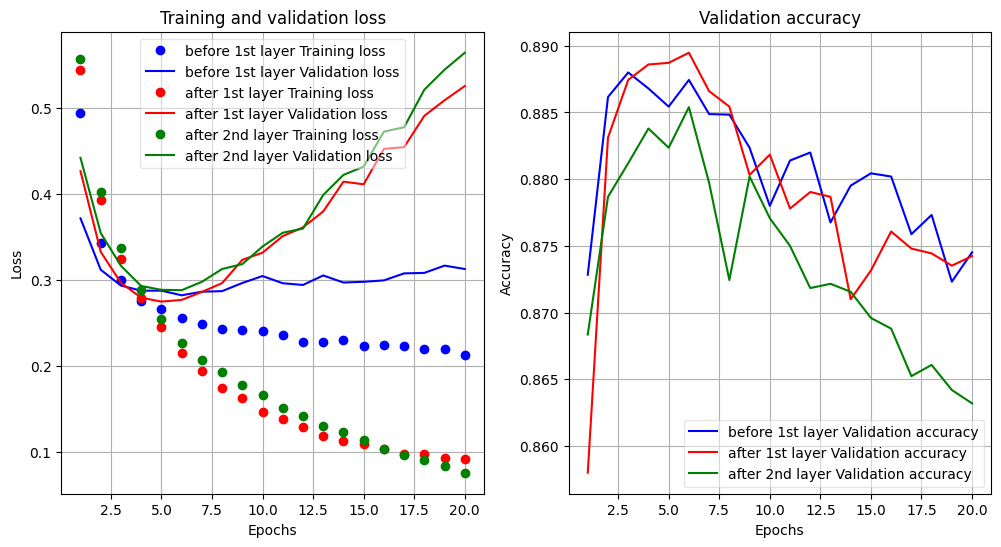

In [ ]:
import matplotlib.pyplot as plt  # Add this line clearly at the top

plt.figure(figsize=(12, 6))
prefixes = ['before 1st layer', 'after 1st layer', 'after 2nd layer']
colors = ['blue', 'red', 'green']

for i, hist in enumerate(hists_b):
    plot_history(hist, colors[i], prefix=prefixes[i])
plt.show()
